In [43]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = '/Users/dhruvbalwada/OneDrive/sogos_data/data/raw/MIMOC_Clim/'

In [46]:
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(data_dir, x)),
                        os.listdir(data_dir) ) )

In [51]:
xr.merge([ds, ds])

<xarray.Dataset>
Dimensions:                   (LAT: 341, LONG: 720, SIG: 75)
Dimensions without coordinates: LAT, LONG, SIG
Data variables:
    LATITUDE                  (LAT) float32 -80.0 -79.5 -79.0 ... 89.0 89.5 90.0
    LONGITUDE                 (LONG) float32 0.0 0.5 1.0 ... 358.5 359.0 359.5
    SIGMA_0                   (SIG) float32 1.022e+03 1.023e+03 ... 1.028e+03
    SUMMED_WEIGHT             (LONG, LAT, SIG) float32 nan nan nan ... nan nan
    YEAR_OF_DATA              (LONG, LAT, SIG) float32 nan nan nan ... nan nan
    PRESSURE                  (LONG, LAT, SIG) float32 nan nan nan ... nan nan
    ABSOLUTE_SALINITY         (LONG, LAT, SIG) float32 nan nan nan ... nan nan
    CONSERVATIVE_TEMPERATURE  (LONG, LAT, SIG) float32 nan nan nan ... nan nan

In [54]:
ds = xr.open_dataset(data_dir + list_of_files[0])

for file in list_of_files[1:]:
    ds = xr.concat([ds, xr.open_dataset(data_dir+file)], dim='month')

In [55]:
ds

<xarray.Dataset>
Dimensions:                   (LAT: 341, LONG: 720, SIG: 75, month: 12)
Dimensions without coordinates: LAT, LONG, SIG, month
Data variables:
    LATITUDE                  (month, LAT) float32 -80.0 -79.5 ... 89.5 90.0
    LONGITUDE                 (month, LONG) float32 0.0 0.5 1.0 ... 359.0 359.5
    SIGMA_0                   (month, SIG) float32 1.022e+03 ... 1.028e+03
    SUMMED_WEIGHT             (month, LONG, LAT, SIG) float32 nan nan ... nan
    YEAR_OF_DATA              (month, LONG, LAT, SIG) float32 nan nan ... nan
    PRESSURE                  (month, LONG, LAT, SIG) float32 nan nan ... nan
    ABSOLUTE_SALINITY         (month, LONG, LAT, SIG) float32 nan nan ... nan
    CONSERVATIVE_TEMPERATURE  (month, LONG, LAT, SIG) float32 nan nan ... nan

In [33]:
#ds_temp = xr.open_dataset(data_dir+file,
#                       combine='nested',
#                       concat_dim='month')

<xarray.Dataset>
Dimensions:                   (LAT: 341, LONG: 720, SIG: 75, month: 12)
Dimensions without coordinates: LAT, LONG, SIG, month
Data variables:
    LATITUDE                  (month, LAT) float32 dask.array<chunksize=(1, 341), meta=np.ndarray>
    LONGITUDE                 (month, LONG) float32 dask.array<chunksize=(1, 720), meta=np.ndarray>
    SIGMA_0                   (month, SIG) float32 dask.array<chunksize=(1, 75), meta=np.ndarray>
    SUMMED_WEIGHT             (month, LONG, LAT, SIG) float32 dask.array<chunksize=(1, 720, 341, 75), meta=np.ndarray>
    YEAR_OF_DATA              (month, LONG, LAT, SIG) float32 dask.array<chunksize=(1, 720, 341, 75), meta=np.ndarray>
    PRESSURE                  (month, LONG, LAT, SIG) float32 dask.array<chunksize=(1, 720, 341, 75), meta=np.ndarray>
    ABSOLUTE_SALINITY         (month, LONG, LAT, SIG) float32 dask.array<chunksize=(1, 720, 341, 75), meta=np.ndarray>
    CONSERVATIVE_TEMPERATURE  (month, LONG, LAT, SIG) float32 dask.array<chunksize=(1, 720, 341, 75), meta=np.ndarray>

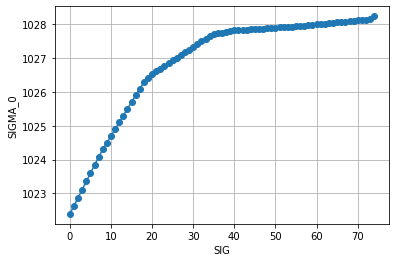

In [19]:
ds.SIGMA_0.plot(marker='o')
plt.grid()

In [42]:
ds.CONSERVATIVE_TEMPERATURE.isel(SIG=32).plot.contourf(x='LONG', levels=41)

ValueError: ('month', 'LONG') must be a permuted list of ('month', 'LONG', 'LAT'), unless `...` is included